<a href="https://colab.research.google.com/github/Ramyanaidu02/Functional/blob/main/diabetes_functional.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from keras.layers import Input,Dense
from keras.models import Model
from keras.utils import plot_model

In [ ]:

inputs = Input(shape=(8,))
l1 = Dense(8,activation='relu')(inputs)
l2 = Dense(10,activation='relu')(l1)
output_1 = Dense(1,activation='sigmoid',name='output_1')(l2)
output_2 = Dense(1,activation='linear',name='output_2')(l2)



In [ ]:
model = Model(inputs=inputs,outputs=[output_1,output_2])


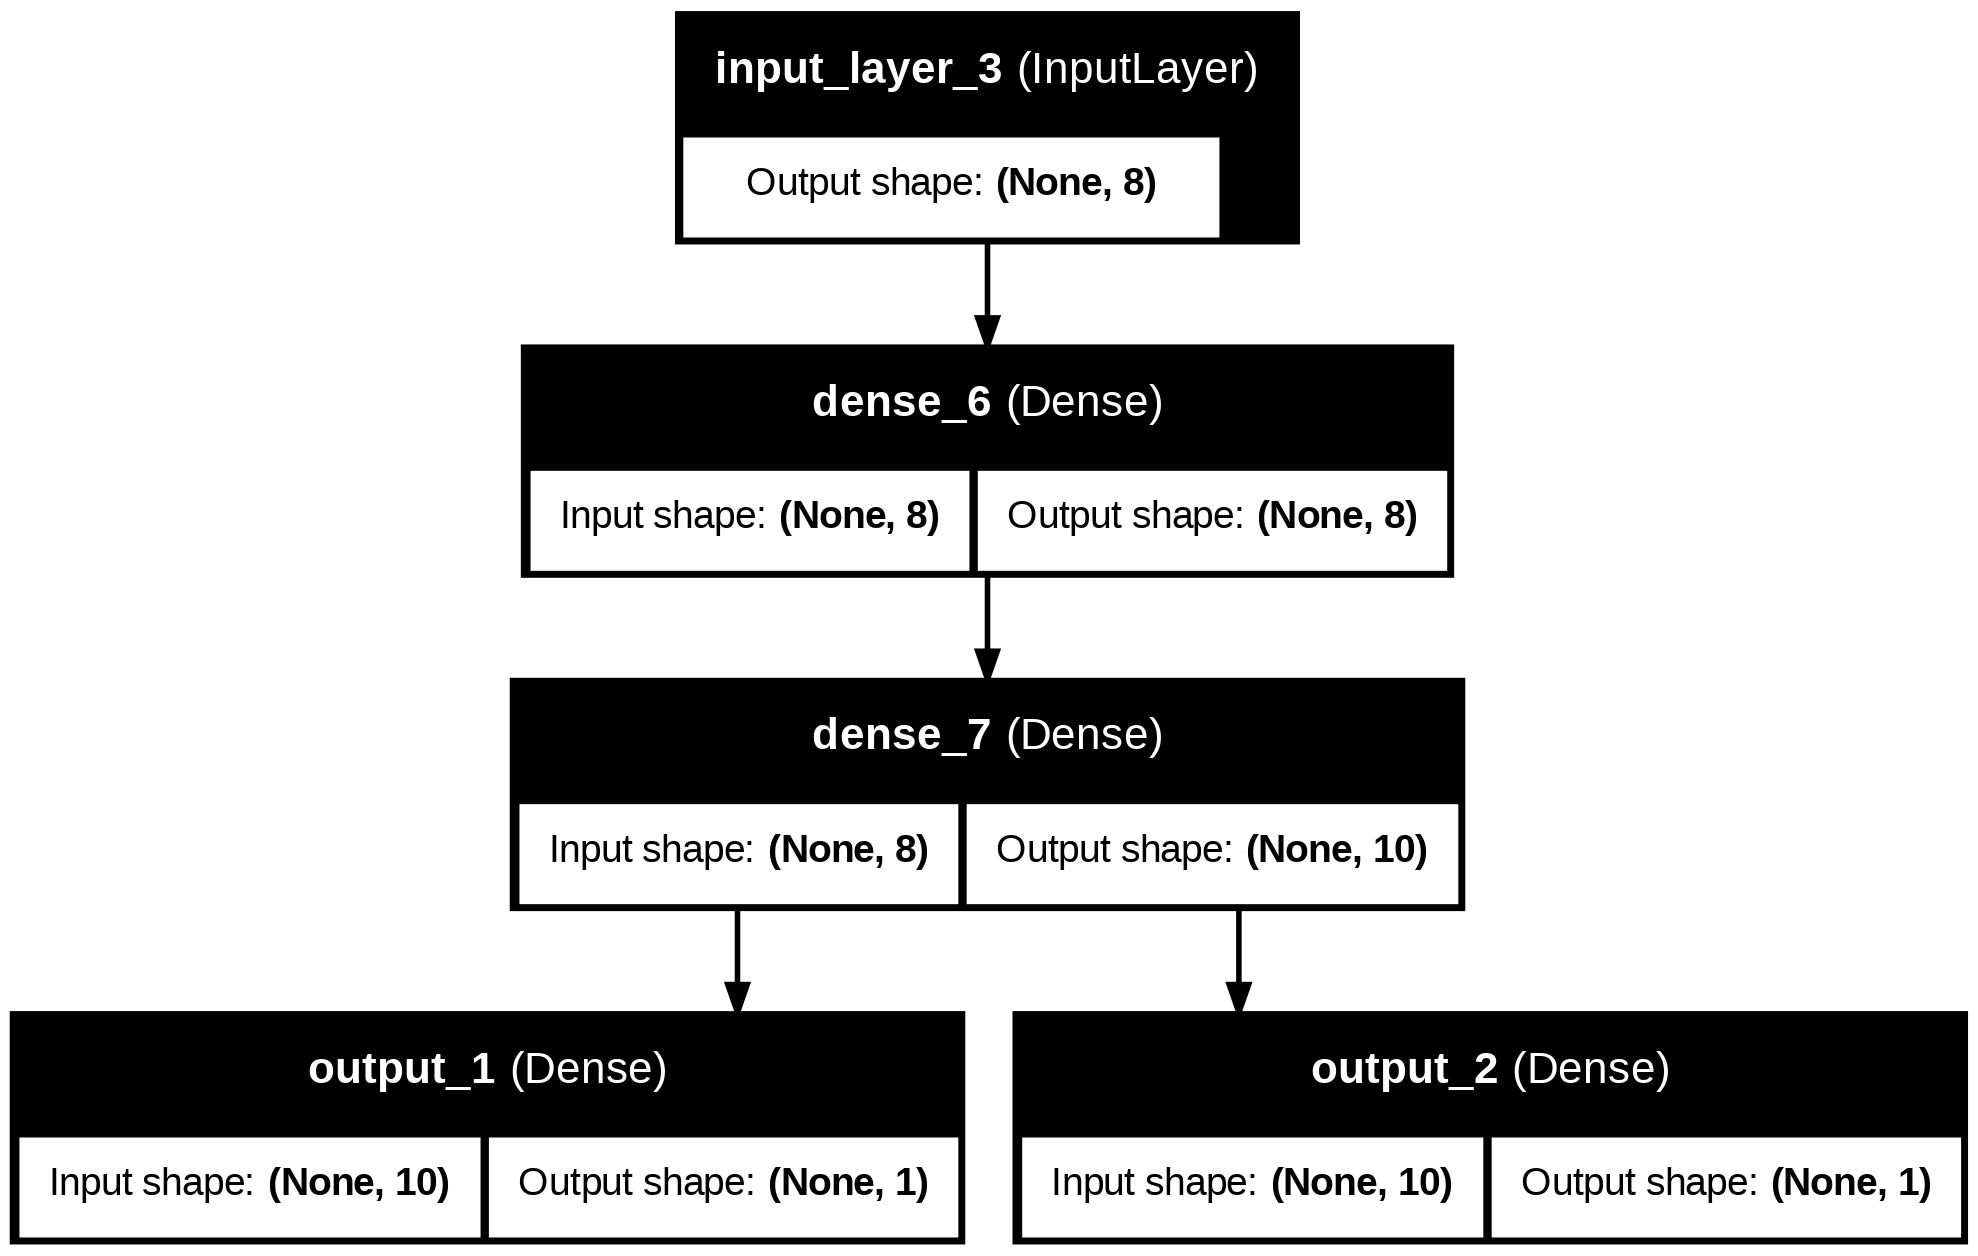

In [ ]:
plot_model(model,to_file='model_plot.png',show_shapes=True,show_layer_names=True)

In [ ]:
import pandas as pd
df = pd.read_csv('/content/diabetes.csv')

In [ ]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
#prediction 1 is outcome
#prediction 2 is BMI

In [ ]:
X = df.drop(columns=['Outcome','BMI'])

In [ ]:
y_classification = df['Outcome']
y_regression = df['BMI']

In [ ]:
inputs = Input(shape=(7,))
l1 = Dense(8,activation='relu')(inputs)
l2 = Dense(10,activation='relu')(l1)
l3 = Dense(10,activation='relu')(l2)
output_1 = Dense(1,activation='sigmoid',name='output_1')(l3)
output_2 = Dense(1,activation='linear',name='output_2')(l3)

In [ ]:
model = Model(inputs=inputs,outputs=[output_1,output_2])

In [ ]:
model.compile(optimizer='adam',loss={'output_1':'binary_crossentropy','output_2':'mse'},metrics={'output_1':'accuracy','output_2':'mae'})

In [ ]:
model.summary()

Model: "functional_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_4             │ (None, 7)              │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_8 (Dense)           │ (None, 8)              │             64 │ input_layer_4[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_9 (Dense)           │ (None, 10)             │             90 │ dense_8[0][0]          │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_10 (Dense)          │ (None, 10)             │            110 │ dense_9[0][0]          │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ output_1 (Dense)          │ (None, 1)              │             11 │ dense_10[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ output_2 (Dense)          │ (None, 1)              │             11 │ dense_10[0][0]         │
└───────────────────────────┴────────────────────────┴────────────────┴────────────────────────┘

 Total params: 286 (1.12 KB)

 Trainable params: 286 (1.12 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_class_train,y_class_test,y_reg_train,y_reg_test = train_test_split(X,y_classification,y_regression,test_size=0.2)

In [ ]:
model.fit(X_train,{'output_1':y_class_train,'output_2':y_reg_train},batch_size=12,epochs=5)

Epoch 1/5
52/52 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - loss: 312.8032 - output_1_accuracy: 0.6863 - output_2_mae: 14.3132
Epoch 2/5
52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 277.3971 - output_1_accuracy: 0.6324 - output_2_mae: 12.9907
Epoch 3/5
52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 158.3810 - output_1_accuracy: 0.6670 - output_2_mae: 9.1085
Epoch 4/5
52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 111.1076 - output_1_accuracy: 0.6816 - output_2_mae: 7.9060
Epoch 5/5
52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 108.2580 - output_1_accuracy: 0.6738 - output_2_mae: 7.7869


In [ ]:
predictions = model.predict(X_test)

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step


In [ ]:
(predictions[0]>0.5).astype(int)

array([[0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
    

In [ ]:
regressions = predictions[1]
regressions

array([[14.914469],
       [10.646303],
       [29.32882 ],
       [23.359526],
       [43.023693],
       [25.702713],
       [31.440811],
       [33.589783],
       [22.599035],
       [20.428652],
       [31.72984 ],
       [36.8823  ],
       [27.869884],
       [35.853977],
       [34.43401 ],
       [30.105879],
       [30.837553],
       [52.185856],
       [42.225895],
       [28.627283],
       [36.029373],
       [28.437813],
       [35.69316 ],
       [30.563482],
       [25.598843],
       [29.988503],
       [29.412397],
       [31.727766],
       [28.551943],
       [30.567667],
       [44.860188],
       [37.9913  ],
       [38.112812],
       [36.950485],
       [30.475882],
       [37.474243],
       [29.9121  ],
       [30.394117],
       [23.995327],
       [29.147877],
       [34.251236],
       [52.998203],
       [31.86066 ],
       [27.678667],
       [29.274767],
       [44.8827  ],
       [33.67964 ],
       [22.380472],
       [36.22284 ],
       [25.50652 ],


In [ ]:
results = pd.DataFrame({'actualclasses':y_class_test,'predictedclasses':(predictions[0]>0.5).astype(int).flatten(),'actual_regression':y_reg_test,'predicted_regression':regressions.flatten()})

In [ ]:
results

,actualclasses,predictedclasses,actual_regression,predicted_regression
332,1,0,43.3,14.914469
222,0,0,25.2,10.646303
529,0,0,24.6,29.328819
288,0,0,20.8,23.359526
480,1,0,35.5,43.023693
...,...,...,...,...
267,0,0,40.0,25.284393
301,1,0,31.6,29.405478
649,0,0,26.4,24.379171
731,1,0,28.4,41.299412
